In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.use('Agg')
plt.switch_backend('agg')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,auc

%matplotlib inline

sns.set(style = 'whitegrid')

np.random.seed(42)

In [34]:
df = pd.read_csv('Fashion.csv',encoding='latin1')
df

,Timestamp,1.Age Group,2.Gender,3.Profession,Section 2: Style Preferences\n4. How would you describe your go-to daily outfit? (Select one),5. Whats your favorite color palette for clothing?,6. Do you prioritize functionality or aesthetics in your outfits?,7.Which of these best describes your wardrobe?,Section 3: Shopping Habits\n8. How often do you shop for new clothes?,9.What influences your clothing purchases the most?,10. Where do you typically shop for clothes? (Select all that apply),Section 4: Lifestyle\n11. How often do you attend formal events?,12.Do you often experiment with new styles or stick to what you know?,13. What kind of footwear do you wear most often?,14. How active is your daily lifestyle?,Section 5: Personal Preferences\n15. How important is comfort in your clothing choices\n,"16.If you had to choose, would you prefer timeless pieces or trendy items?",17. From scale 1-10 how much do you think your clothing style reflects about your personality?,Section 2: Style Preferences,Column 18
0,14-01-2025 19:33,1824,Female,Student,"Chic (e.g., tailored, stylish)","Pastels (soft pink, baby blue)",Slightly prefer aesthetics,Mix-and-match (varied styles),Rarely,Comfort,Local boutiques,- Occasionally (a few times a year),Sometimes experiment,Sneakers,Mostly sedentary,- Extremely important,"Mostly trendy, some timeless",8.0,NaN,NaN
1,21-01-2025 22:13,1824,Female,Student,"Casual (e.g., jeans, t-shirts)","Dark tones (navy, maroon)",Slightly prefer functionality,Mix-and-match (varied styles),Every few months,Sustainability,Thrift stores,- Occasionally (a few times a year),Sometimes experiment,Sandals/Flats,Moderately active,- Somewhat important,"Mostly timeless, some trendy",6.0,NaN,NaN
2,21-01-2025 22:24,1824,Female,Student,"Casual (e.g., jeans, t-shirts)","Neutral (black, white, beige)",Slightly prefer functionality,Minimalist (few versatile pieces),Monthly,Comfort,Local boutiques,- Occasionally (a few times a year),Rarely experiment,Sneakers,Moderately active,- Extremely important,"Mostly timeless, some trendy",9.0,NaN,NaN
3,21-01-2025 22:25,1824,Male,Student,"Casual (e.g., jeans, t-shirts)","Neutral (black, white, beige)",Equal balance of both,Specialized (specific to one style),Every few months,Comfort,Thrift stores,- Rarely (less than once a year),Sometimes experiment,Sneakers,"Very active (e.g., gym, outdoor activities)",- Somewhat important,Always timeless,6.0,NaN,NaN
4,21-01-2025 22:38,1824,Male,Student,"Casual (e.g., jeans, t-shirts)","Neutral (black, white, beige)",Slightly prefer aesthetics,Minimalist (few versatile pieces),Rarely,Comfort,Thrift stores,- Occasionally (a few times a year),Rarely experiment,Sneakers,"Very active (e.g., gym, outdoor activities)",- Somewhat important,"Mostly timeless, some trendy",6.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,31-01-2025 18:01,1824,Male,Student,"Formal (e.g., suits, dresses)","Neutral (black, white, beige)",Strongly prefer functionality,Minimalist (few versatile pieces),Monthly,Comfort,Luxury brands,- Occasionally (a few times a year),Rarely experiment,Boots,"Very active (e.g., gym, outdoor activities)",- Extremely important,Always timeless,10.0,NaN,NaN
146,31-01-2025 18:30,1824,Male,Student,"Sporty (e.g., activewear, sneakers)",Mixed or patterned,Slightly prefer functionality,Minimalist (few versatile pieces),Every few months,Brand reputation,Fast fashion stores,- Frequently (weekly or monthly),Always experiment,Sneakers,Moderately active,- Somewhat important,"Mostly timeless, some trendy",8.0,NaN,NaN
147,03-02-2025 23:34,1824,Male,Student,"Casual (e.g., jeans, t-shirts)","Neutral (black, white, beige)",Equal balance of both,Mix-and-match (varied styles),Every few months,Trends,Online retailers,- Occasionally (a few times a year),Sometimes experiment,Sneakers,"Very active (e.g., gym, outdoor activities)",- Extremely important,"Mostly timeless, some trendy",8.0,NaN,NaN
148,04-02-2025 00:03,1824,Male,Stud

In [35]:
df.head()

,Timestamp,1.Age Group,2.Gender,3.Profession,Section 2: Style Preferences\n4. How would you describe your go-to daily outfit? (Select one),5. Whats your favorite color palette for clothing?,6. Do you prioritize functionality or aesthetics in your outfits?,7.Which of these best describes your wardrobe?,Section 3: Shopping Habits\n8. How often do you shop for new clothes?,9.What influences your clothing purchases the most?,10. Where do you typically shop for clothes? (Select all that apply),Section 4: Lifestyle\n11. How often do you attend formal events?,12.Do you often experiment with new styles or stick to what you know?,13. What kind of footwear do you wear most often?,14. How active is your daily lifestyle?,Section 5: Personal Preferences\n15. How important is comfort in your clothing choices\n,"16.If you had to choose, would you prefer timeless pieces or trendy items?",17. From scale 1-10 how much do you think your clothing style reflects about your personality?,Section 2: Style Preferences,Column 18
0,14-01-2025 19:33,1824,Female,Student,"Chic (e.g., tailored, stylish)","Pastels (soft pink, baby blue)",Slightly prefer aesthetics,Mix-and-match (varied styles),Rarely,Comfort,Local boutiques,- Occasionally (a few times a year),Sometimes experiment,Sneakers,Mostly sedentary,- Extremely important,"Mostly trendy, some timeless",8.0,NaN,NaN
1,21-01-2025 22:13,1824,Female,Student,"Casual (e.g., jeans, t-shirts)","Dark tones (navy, maroon)",Slightly prefer functionality,Mix-and-match (varied styles),Every few months,Sustainability,Thrift stores,- Occasionally (a few times a year),Sometimes experiment,Sandals/Flats,Moderately active,- Somewhat important,"Mostly timeless, some trendy",6.0,NaN,NaN
2,21-01-2025 22:24,1824,Female,Student,"Casual (e.g., jeans, t-shirts)","Neutral (black, white, beige)",Slightly prefer functionality,Minimalist (few versatile pieces),Monthly,Comfort,Local boutiques,- Occasionally (a few times a year),Rarely experiment,Sneakers,Moderately active,- Extremely important,"Mostly timeless, some trendy",9.0,NaN,NaN
3,21-01-2025 22:25,1824,Male,Student,"Casual (e.g., jeans, t-shirts)","Neutral (black, white, beige)",Equal balance of both,Specialized (specific to one style),Every few months,Comfort,Thrift stores,- Rarely (less than once a year),Sometimes experiment,Sneakers,"Very active (e.g., gym, outdoor activities)",- Somewhat important,Always timeless,6.0,NaN,NaN
4,21-01-2025 22:38,1824,Male,Student,"Casual (e.g., jeans, t-shirts)","Neutral (black, white, beige)",Slightly prefer aesthetics,Minimalist (few versatile pieces),Rarely,Comfort,Thrift stores,- Occasionally (a few times a year),Rarely experiment,Sneakers,"Very active (e.g., gym, outdoor activities)",- Somewhat important,"Mostly timeless, some trendy",6.0,NaN,NaN


In [66]:
df.columns = df.columns.str.strip()  # Strip any whitespace from column names
df = df.rename(columns={
    '1.Age Group': "agegroup",
    '2.Gender': 'gender',
    '3.profession': 'profession',
    'Section 2: Style Preferences\n4. How would you describe your go-to daily outfit? (Select one)': 'stylepreference',
    '5. Whats your favorite color palette for clothing?': 'fav color',
    '6. Do you prioritize functionality or aesthetics in your outfits?': 'prioritize',
    '7.Which of these best describes your wardrobe?': 'wardrobe',
    'Section 3: Shopping Habits\n8. How often do you shop for new clothes?': 'shopping',
    '9.What influences your clothing purchases the most?': 'influence',
    '10. Where do you typically shop for clothes? (Select all that apply)': 'shop',
    'Section 4: Lifestyle\n11. How often do you attend formal events?': 'lifestyle',
    '12.Do you often experiment with new styles or stick to what you know?': "style",
    '13. What kind of footwear do you wear most often?': 'footwear',
    '14. How active is your daily lifestyle?': 'daily lifestyle',
    'Section 5: Personal Preferences\n15. How important is comfort in your clothing choices\n': 'personel info',
    '16.If you had to choose, would you prefer timeless pieces or trendy items?': 'trendy items',
    '17. From scale 1-10 how much do you think your clothing style reflects about your personality?': 'scale'
})

In [67]:
df.shape

(143, 18)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 0 to 149
Data columns (total 18 columns):
 #   Column                                                                                 Non-Null Count  Dtype         
---  ------                                                                                 --------------  -----         
 0   Timestamp                                                                              143 non-null    datetime64[ns]
 1   agegroup                                                                               143 non-null    object        
 2   gender                                                                                 143 non-null    object        
 3   3.Profession                                                                           143 non-null    object        
 4   stylepreference                                                                        143 non-null    object        
 5   5. Whats your favorite color pale

In [69]:
df.columns = df.columns.str.strip()

In [70]:
df.head(1)

,Timestamp,agegroup,gender,3.Profession,stylepreference,5. Whats your favorite color palette for clothing?,prioritize,wardrobe,shopping,influence,shop,lifestyle,style,footwear,daily lifestyle,Section 5: Personal Preferences\n15. How important is comfort in your clothing choices,trendy items,scale
0,2025-01-14 19:33:00,1824,Female,Student,"Chic (e.g., tailored, stylish)","Pastels (soft pink, baby blue)",Slightly prefer aesthetics,Mix-and-match (varied styles),Rarely,Comfort,Local boutiques,- Occasionally (a few times a year),Sometimes experiment,Sneakers,Mostly sedentary,- Extremely important,"Mostly trendy, some timeless",8.0


In [71]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.isnull().sum()

Timestamp                                                                                 0
agegroup                                                                                  0
gender                                                                                    0
3.Profession                                                                              0
stylepreference                                                                           0
5. Whats your favorite color palette for clothing?                                       0
prioritize                                                                                0
wardrobe                                                                                  0
shopping                                                                                  0
influence                                                                                 0
shop                                                                            

In [72]:
if 'Section 2: Style Preferences' in df.columns:
    df.drop('Section 2: Style Preferences', axis=1, inplace=True)
if 'Column 18' in df.columns:
    df.drop('Column 18', axis=1, inplace=True)
df.drop(['Section 2: Style Preferences', 'Column 18'], 
       axis=1, 
       inplace=True, 
       errors='ignore')  

df.dropna(inplace=True)
df.isnull().sum()

Timestamp                                                                                 0
agegroup                                                                                  0
gender                                                                                    0
3.Profession                                                                              0
stylepreference                                                                           0
5. Whats your favorite color palette for clothing?                                       0
prioritize                                                                                0
wardrobe                                                                                  0
shopping                                                                                  0
influence                                                                                 0
shop                                                                            

In [73]:
categorical  = df.select_dtypes(include = 'object')
numerical = df.select_dtypes(include = 'float64')

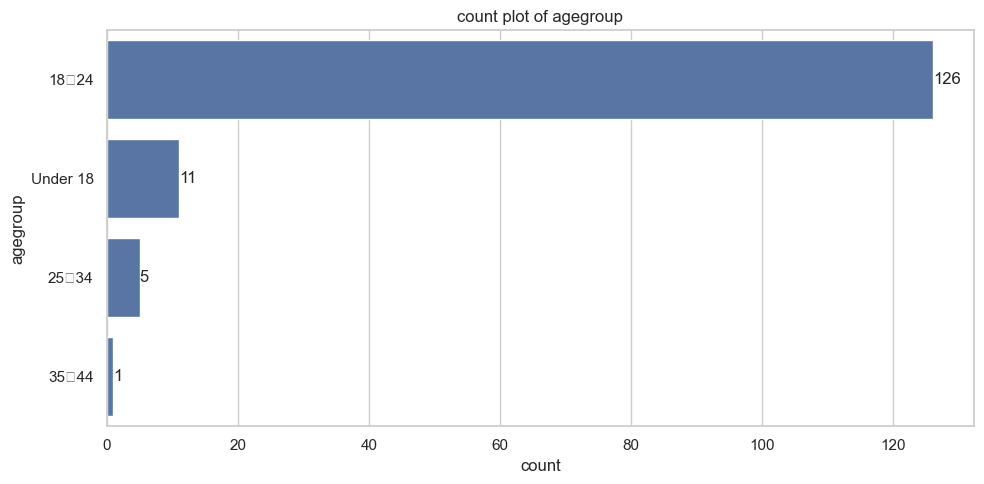

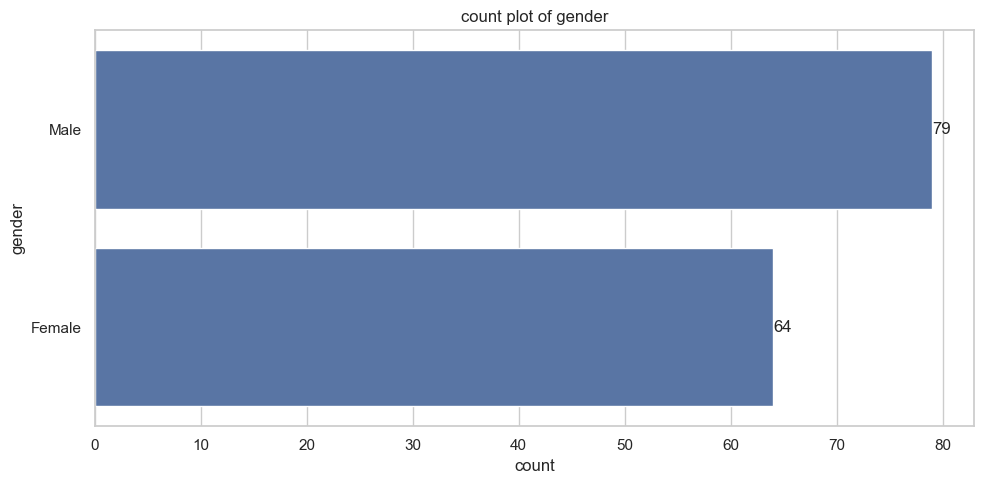

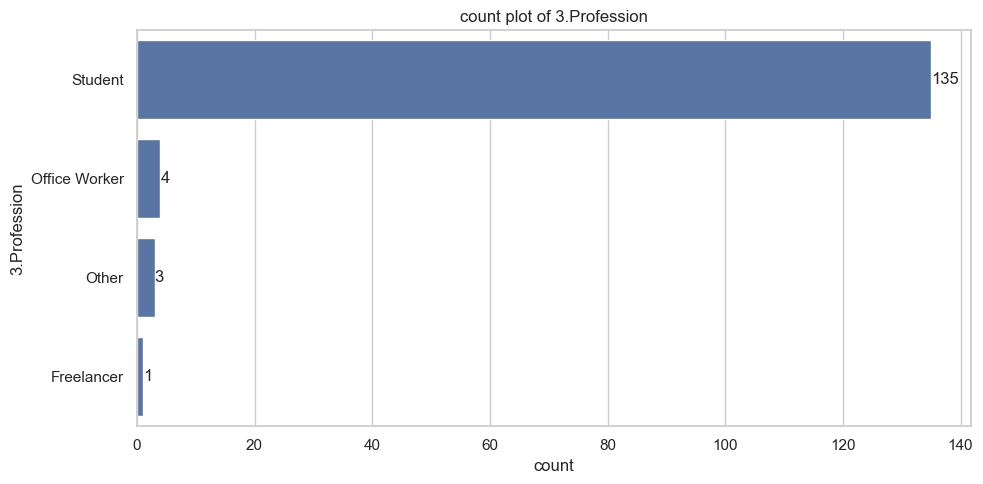

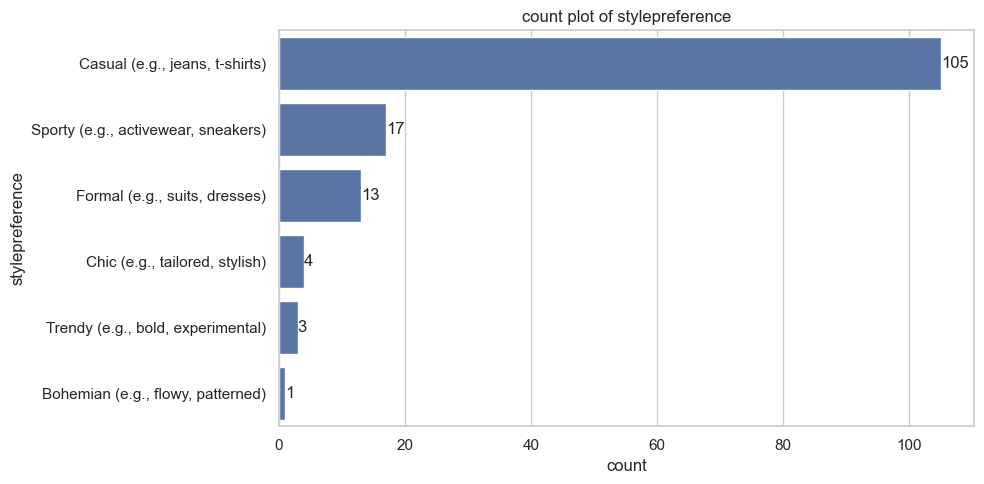

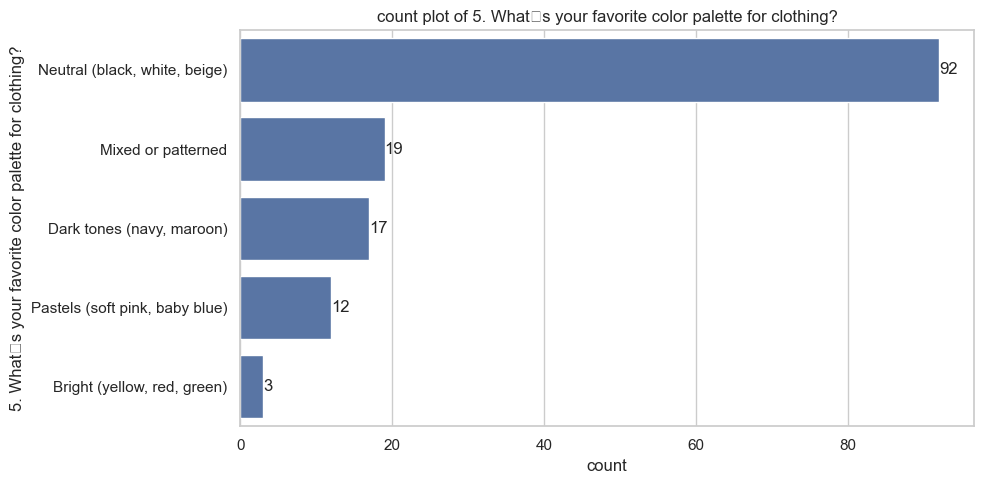

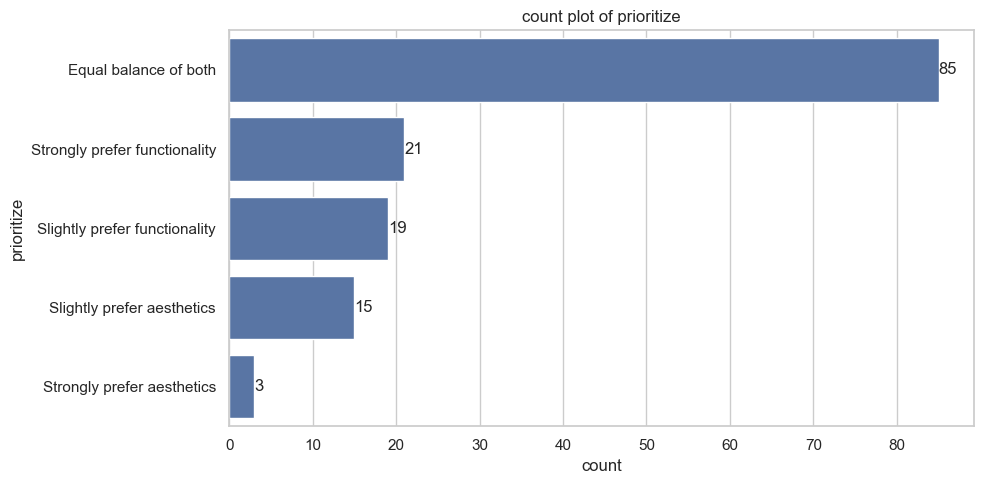

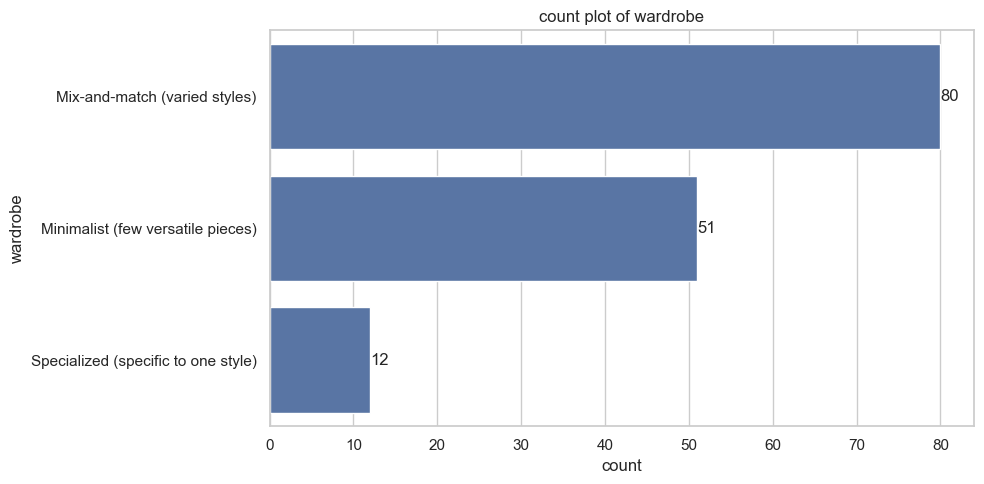

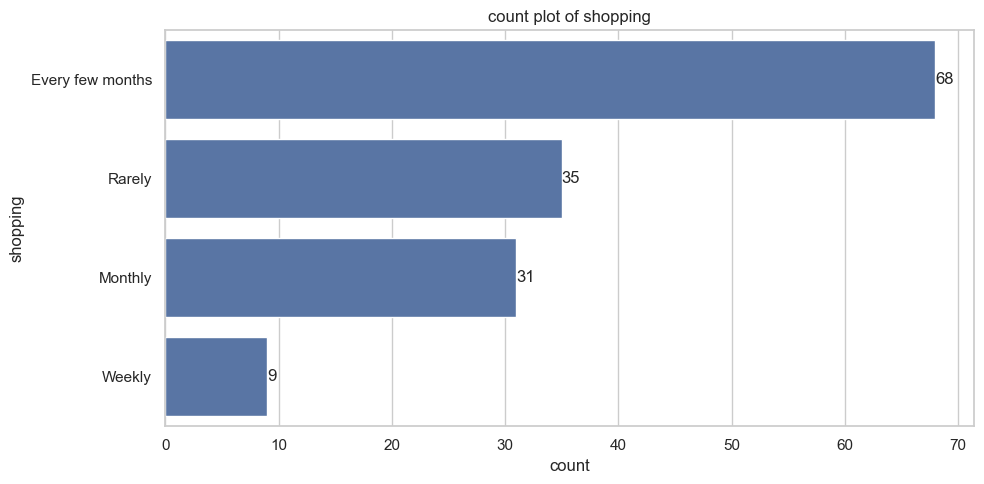

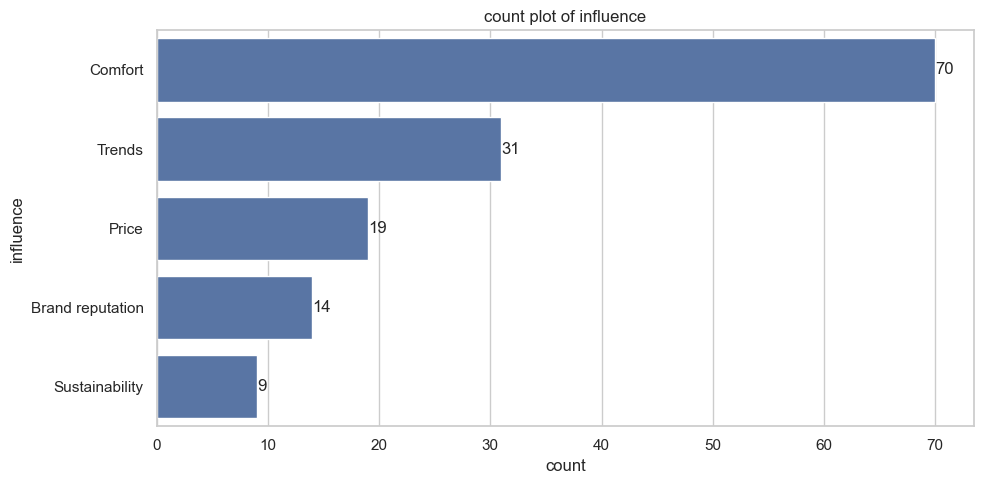

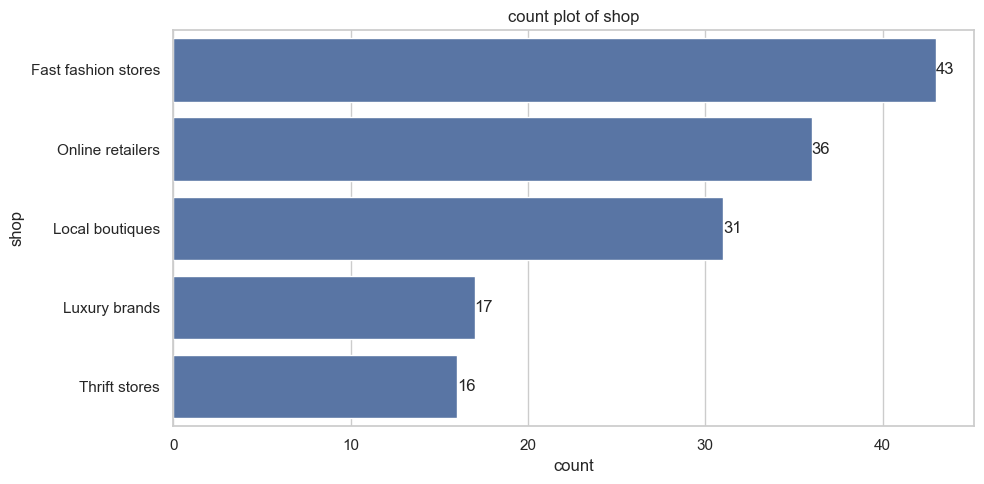

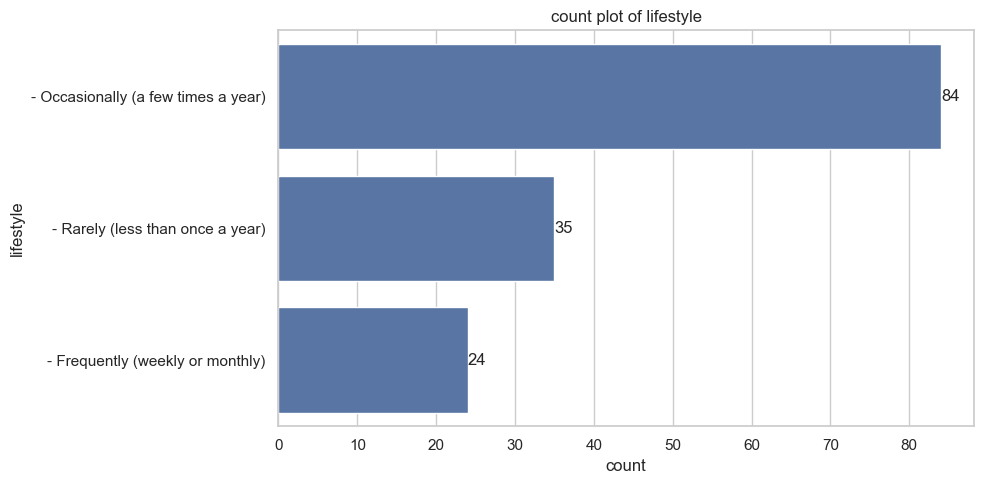

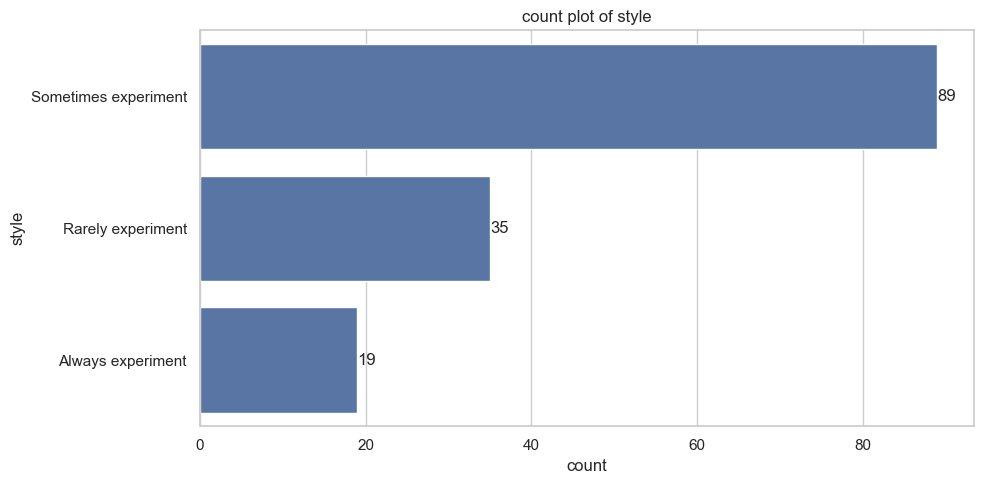

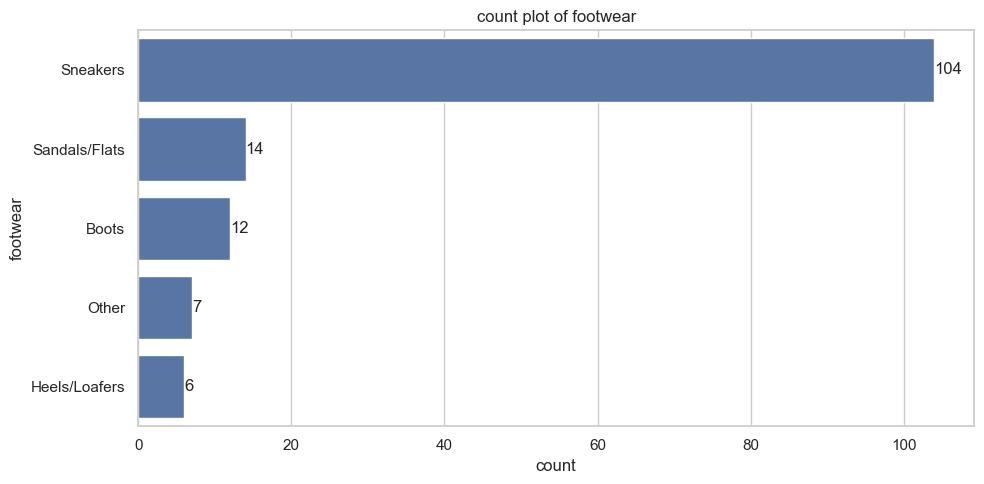

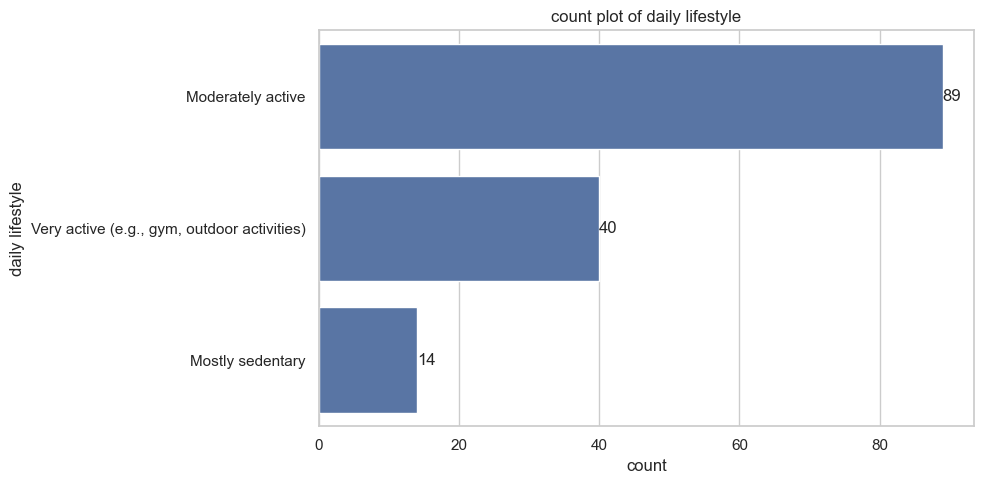

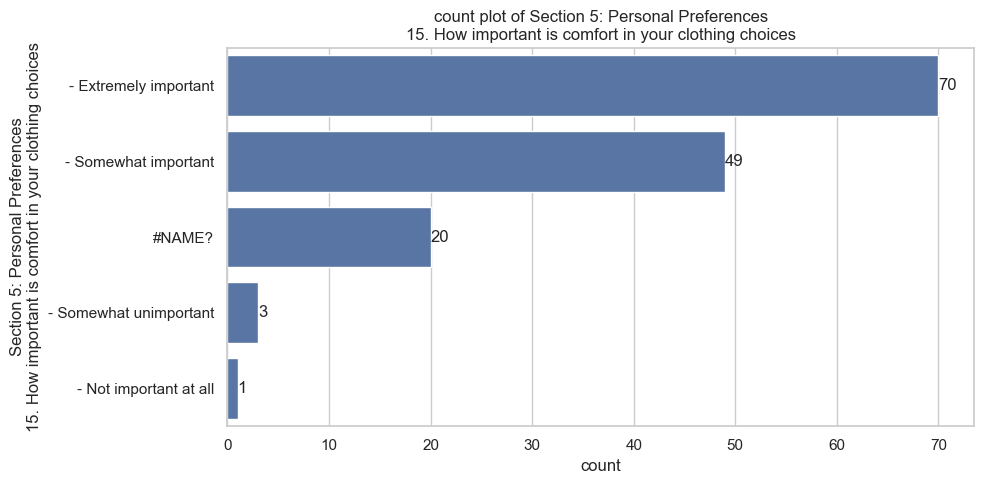

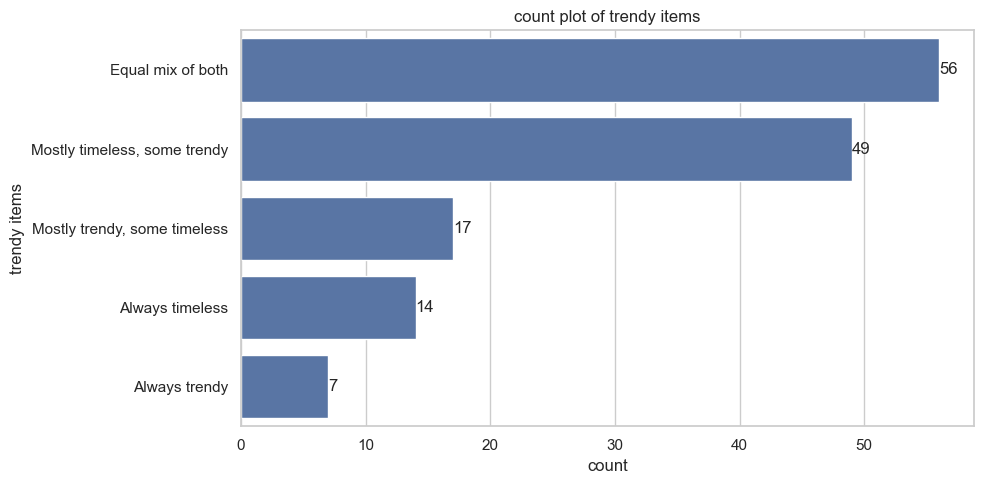

In [74]:
for col in categorical:
  plt.figure(figsize = (10,5))
  ax = sns.countplot(y = col, data = df, order = df[col].value_counts().index)
  ax.bar_label(ax.containers[0])
  plt.title(f'count plot of {col}')
  plt.tight_layout()
  plt.show()

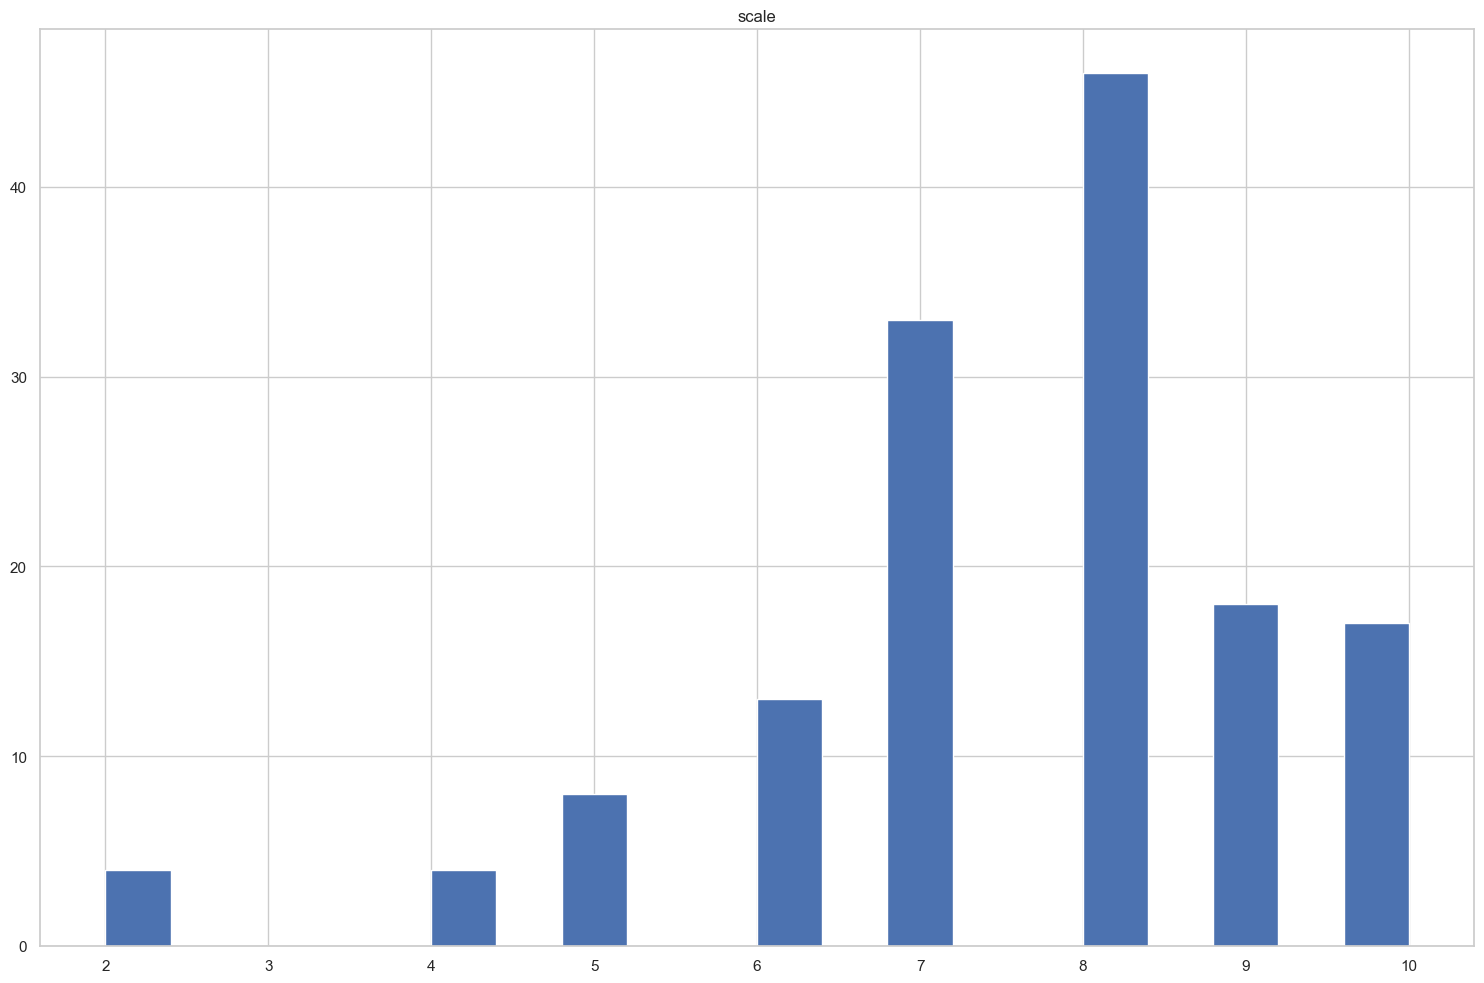

In [75]:
if numerical.shape[1]>0:
  numerical.hist(figsize = (15,10),bins = 20)
  plt.tight_layout()
  plt.show()


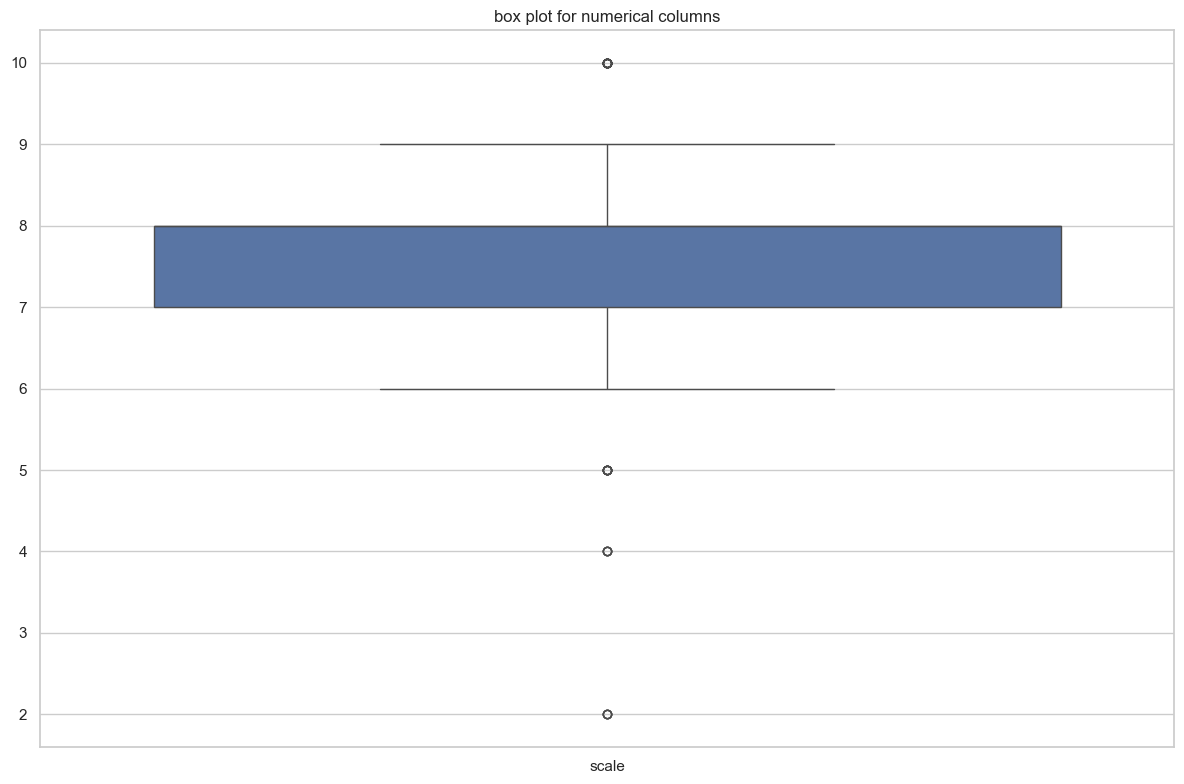

In [76]:
if numerical.shape[1]>0:
  plt.figure(figsize= (12,8))
  sns.boxplot(data = numerical)
  plt.title("box plot for numerical columns")
  plt.tight_layout()
  plt.show()

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 0 to 149
Data columns (total 18 columns):
 #   Column                                                                                 Non-Null Count  Dtype         
---  ------                                                                                 --------------  -----         
 0   Timestamp                                                                              143 non-null    datetime64[ns]
 1   agegroup                                                                               143 non-null    object        
 2   gender                                                                                 143 non-null    object        
 3   3.Profession                                                                           143 non-null    object        
 4   stylepreference                                                                        143 non-null    object        
 5   5. Whats your favorite color pale

In [79]:
target_column = 'scale'
if target_column not in df.columns:
  raise ValueError(f"Target column '{target_column}' not found in the DataFrame.")


In [80]:
predicting_columns = ['agegroup','gender','3.Profession']

In [81]:
for col in predicting_columns:
  if col not in df.columns:
    raise ValueError(f"Predicting column '{col}' not found in the df.")

In [82]:
df_model = df[predicting_columns + [target_column]]
df_model.head()

,agegroup,gender,3.Profession,scale
0,1824,Female,Student,8.0
1,1824,Female,Student,6.0
2,1824,Female,Student,9.0
3,1824,Male,Student,6.0
4,1824,Male,Student,6.0


In [83]:
df_model = pd.get_dummies(df_model, drop_first = True)
df_model.head()

,scale,agegroup_2534,agegroup_3544,agegroup_Under 18,gender_Male,3.Profession_Office Worker,3.Profession_Other,3.Profession_Student
0,8.0,False,False,False,False,False,False,True
1,6.0,False,False,False,False,False,False,True
2,9.0,False,False,False,False,False,False,True
3,6.0,False,False,False,True,False,False,True
4,6.0,False,False,False,True,False,False,True


In [84]:
for col in df_model.columns:
  # Check if the column's data type is boolean
  if df_model[col].dtype == bool:
    # Apply the mapping from True/False to 1/0
    df_model[col] = df_model[col].map({True: 1, False: 0})


In [85]:
df_model.head()

,scale,agegroup_2534,agegroup_3544,agegroup_Under 18,gender_Male,3.Profession_Office Worker,3.Profession_Other,3.Profession_Student
0,8.0,0,0,0,0,0,0,1
1,6.0,0,0,0,0,0,0,1
2,9.0,0,0,0,0,0,0,1
3,6.0,0,0,0,1,0,0,1
4,6.0,0,0,0,1,0,0,1


In [86]:
x=df_model.drop(target_column,axis=1)
y=df_model[target_column]

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [88]:
clf=RandomForestClassifier(n_estimators=100,random_state=42)
clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [89]:
y_pred=clf.predict(x_test)

In [90]:
acc=accuracy_score(y_test,y_pred)
print(f'Accuracy of the model is{acc}')


Accuracy of the model is0.3793103448275862


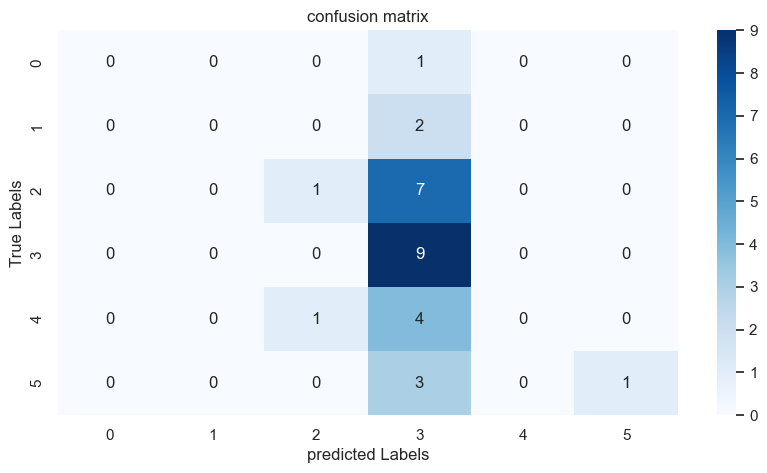

In [91]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title("confusion matrix")
plt.xlabel('predicted Labels')
plt.ylabel('True Labels')
plt.show()


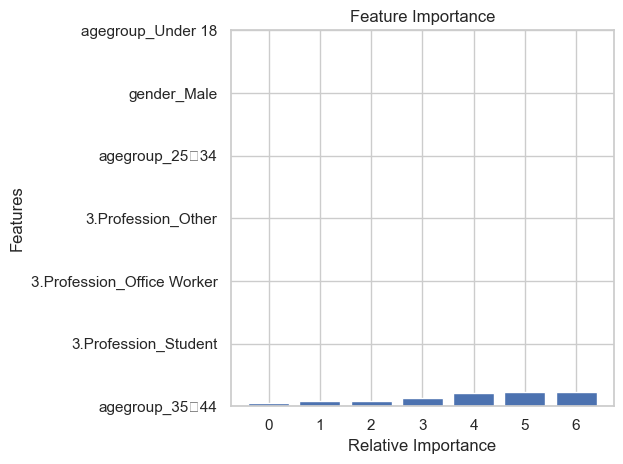

In [92]:
importances = clf.feature_importances_
indices = np.argsort(importances)
plt.bar(range(len(indices)), importances[indices], align='center')  # Changed barplot to bar and fixed align parameter
plt.yticks(range(len(indices)), x.columns[indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

Accuracy of the model is0.27586206896551724


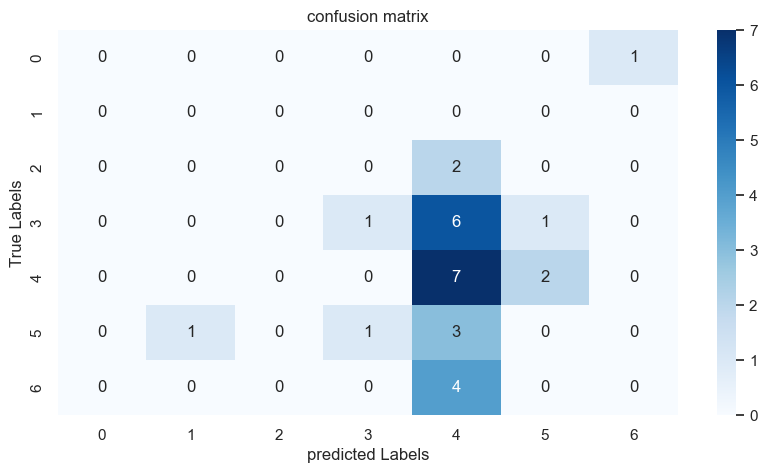

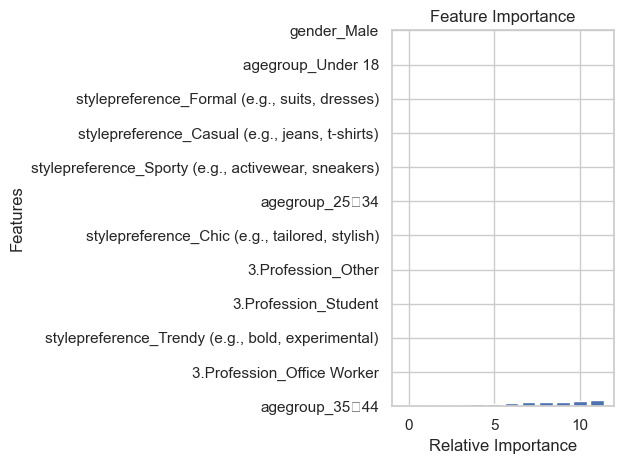

In [94]:
predicting_columns = ['agegroup','gender','3.Profession','stylepreference']
df_model = df[predicting_columns + [target_column]]
df_model = pd.get_dummies(df_model, drop_first = True)
for col in df_model.columns:
  # Check if the column's data type is boolean
  if df_model[col].dtype == bool:
    # Apply the mapping from True/False to 1/0
    df_model[col] = df_model[col].map({True: 1, False: 0})
x=df_model.drop(target_column,axis=1)
y=df_model[target_column]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
clf=RandomForestClassifier(n_estimators=100,random_state=42)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print(f'Accuracy of the model is{acc}')
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title("confusion matrix")
plt.xlabel('predicted Labels')
plt.ylabel('True Labels')
plt.show()
importances = clf.feature_importances_
indices = np.argsort(importances)
plt.bar(range(len(indices)), importances[indices], align='center')  # Changed barplot to bar and fixed align parameter
plt.yticks(range(len(indices)), x.columns[indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

In [95]:
df.columns

Index(['Timestamp', 'agegroup', 'gender', '3.Profession', 'stylepreference',
       '5. Whats your favorite color palette for clothing?', 'prioritize',
       'wardrobe', 'shopping', 'influence', 'shop', 'lifestyle', 'style',
       'footwear', 'daily lifestyle',
       'Section 5: Personal Preferences\n15. How important is comfort in your clothing choices',
       'trendy items', 'scale'],
      dtype='object')

In [97]:
len(df['gender'].unique())

2

In [98]:
len(categorical[' daily lifestyle'])

KeyError: ' daily lifestyle'

In [ ]:
if 'product_name' in categorical.columns:  # If categorical is a DataFrame
    print(len(categorical['product_name']))
else:
    # List available columns to help identify the correct column name
    print("Available columns:", categorical.columns.tolist())
